<a href="https://colab.research.google.com/github/athenianravenclaw/Estimation-theory/blob/main/Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-9-fba2fcebf12a>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[k] = C @ X[k]


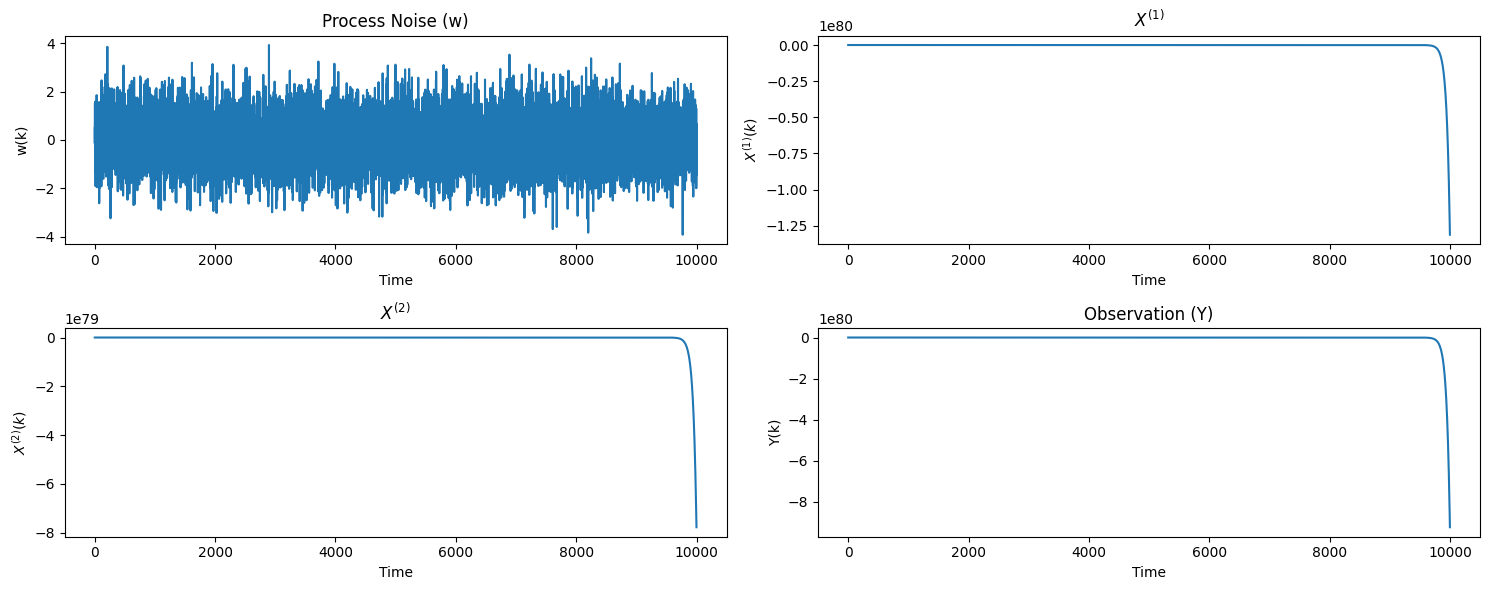

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 2
A = np.array([[0.9, 0.2], [0.1, 0.85]])  # Stable A matrix
B = np.array([[0.1], [0.05]])  # Non-trivial B matrix
C = np.array([[10.0, -5.0]])  # Observation matrix
P0 = np.eye(2)  # Covariance of initial state
sigma2 = 1  # Variance of w(k)
sigma = np.sqrt(sigma2)
time_points = 10000

# Generating data
X = np.zeros((time_points, n))  # State
Y = np.zeros(time_points)  # Observations
w = np.random.normal(0, sigma, size=time_points)

# Initial state
X[0] = np.random.multivariate_normal(np.zeros(n), P0)


for k in range(1, time_points):
    X[k] = A @ X[k-1] + B.flatten() * w[k-1]
    Y[k] = C @ X[k]

plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.plot(w)
plt.title("Process Noise (w)")
plt.xlabel("Time")
plt.ylabel("w(k)")

plt.subplot(2, 2, 2)
plt.plot(X[:, 0])
plt.title(r"$X^{(1)}$")
plt.xlabel("Time")
plt.ylabel(r"$X^{(1)}(k)$")

plt.subplot(2, 2, 3)
plt.plot(X[:, 1])
plt.title(r"$X^{(2)}$")
plt.xlabel("Time")
plt.ylabel(r"$X^{(2)}(k)$")

plt.subplot(2, 2, 4)
plt.plot(Y)
plt.title("Observation (Y)")
plt.xlabel("Time")
plt.ylabel("Y(k)")

plt.tight_layout()
plt.show()



###Implementing the Kalman Filter
The Kalman filter involves predicting and updating states as follows:

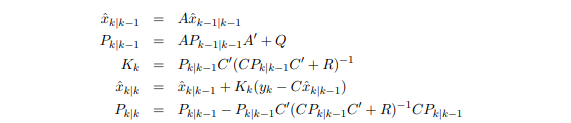


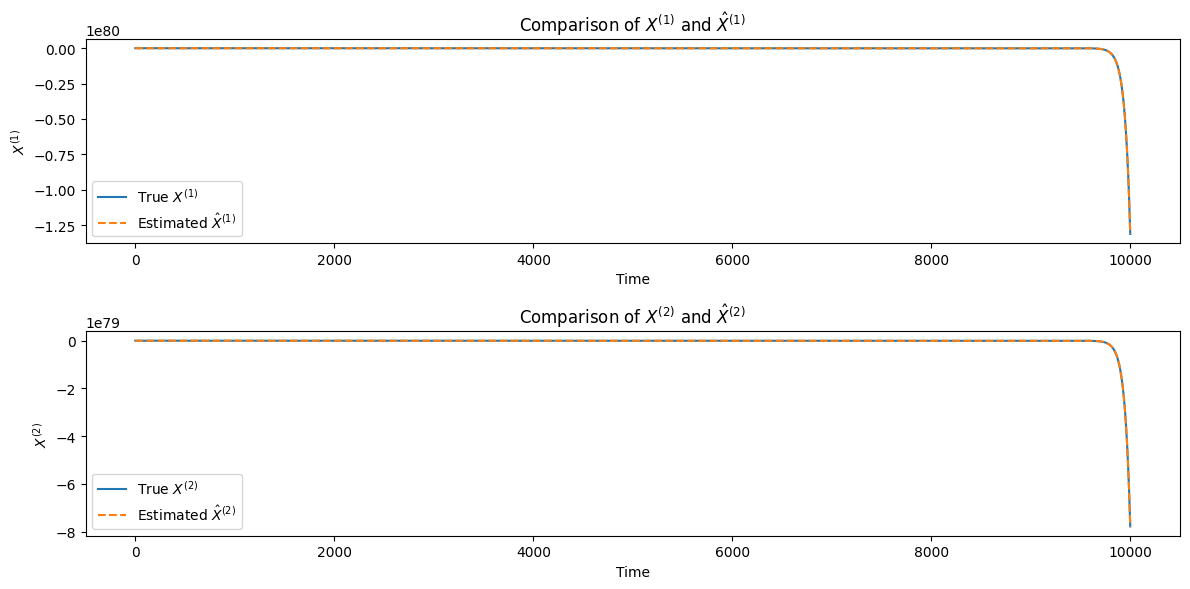

In [ ]:
X_hat = np.zeros_like(X)  # Estimated states
P = P0.copy()  # Covariance matrix
I = np.eye(n)  # Identity matrix

# Kalman filter loop
for k in range(1, time_points):
    # Prediction
    X_hat_k_k1 = A @ X_hat[k-1]
    P_k_k1 = A @ P @ A.T + sigma2 * (B @ B.T)

    # Update
    K_k = P_k_k1 @ C.T / (C @ P_k_k1 @ C.T + sigma2)
    X_hat[k] = X_hat_k_k1 + K_k.flatten() * (Y[k] - C @ X_hat_k_k1)
    P = (I - K_k @ C) @ P_k_k1

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(X[:, 0], label=r"True $X^{(1)}$")
plt.plot(X_hat[:, 0], label=r"Estimated $\hat{X}^{(1)}$", linestyle='--')
plt.title(r"Comparison of $X^{(1)}$ and $\hat{X}^{(1)}$")
plt.xlabel("Time")
plt.ylabel(r"$X^{(1)}$")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(X[:, 1], label=r"True $X^{(2)}$")
plt.plot(X_hat[:, 1], label=r"Estimated $\hat{X}^{(2)}$", linestyle='--')
plt.title(r"Comparison of $X^{(2)}$ and $\hat{X}^{(2)}$")
plt.xlabel("Time")
plt.ylabel(r"$X^{(2)}$")
plt.legend()

plt.tight_layout()
plt.show()
